In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [10]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac = 1,random_state = 3)

In [11]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [12]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

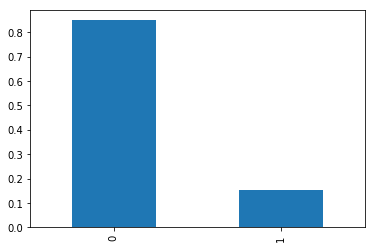

In [13]:
df['TenYearCHD'].value_counts(normalize = True).plot(kind = 'bar')

In [14]:
ms = df.isnull().sum()
ms[ms > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [15]:
df = df.fillna(method = 'ffill')

In [16]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [19]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2968, 15) (1272, 15) (2968,) (1272,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [22]:
lr = LogisticRegression(fit_intercept=True,solver='liblinear')

#### TRAIN

In [32]:
lr.fit(X_train,y_train)
y_train_ypred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,-1]

In [33]:
y_train_ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
y_train_prob

array([0.09360961, 0.05650922, 0.13654031, ..., 0.26987287, 0.74141083,
       0.04590977])

In [41]:
print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

Confusion matrix - Train : 
 [[2520   13]
 [ 400   35]]


In [38]:
print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

Overall accuracy :  0.8608490566037735


In [42]:
print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))

AUC - Train :  0.7314002296127894


#### TEST

In [43]:
y_test_ypred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,-1]

In [44]:
print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

Confusion matrix - Test : 
 [[1060    3]
 [ 200    9]]


In [48]:
print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

Overall accuracy - Test :  0.8404088050314465


In [47]:
print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

AUC - Test :  0.7003605395940892


In [49]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

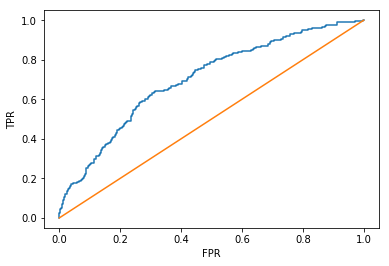

In [51]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()